In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import misc

In [2]:
def series_sum(D,h, lower_bound, upper_bound):
    values = np.linspace(lower_bound, upper_bound, 100)
    interpolant = np.zeros(shape = 100)
    i = 0
    for x in values:
        sum = 0
        for m in range(-10000, 10001):
            exponent = -((x-m*h)*(x-m*h))/(D*h*h)
            sum += 1/math.sqrt(math.pi*D) * math.sin(m*h) * math.exp(exponent)
        interpolant[i] = sum
        i += 1
    return values, interpolant 

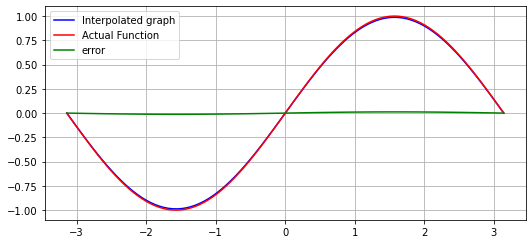

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
   return np.sin(x)

x = np.linspace(-math.pi, math.pi, 100)

plt.grid()
values, interpolant = series_sum(5, 0.1, -math.pi, math.pi)
plt.plot(values, interpolant, color = 'blue', label = 'Interpolated graph')
plt.plot(x, f(x), color = 'red', label = 'Actual Function')
plt.plot(x, f(x) - interpolant, color = 'green', label = 'error')
plt.legend()
plt.show()

In [4]:
def quasi_interpolant(x,y, D, h):
    # Inputs the values of x, y and gives the infinite sum of the series
    sum = 0
    for m1 in range(-100, 101):
        for m2 in range(-100, 101):
            exponent = -((x-m1*h)**2+(y-m2*h)**2)/(D*h**2)
            sum += 1/(math.pi * D) * (1.464*m1*h+5.90*m2*h) * math.exp(exponent)
    return sum


In [5]:
print(quasi_interpolant(2,2, 5, 0.1))

14.727999999999998


In [6]:
X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)


In [7]:
coord_rect = []
for x in X:
    for y in Y:
        if (y - 0.692*x + 5 > 0 ) and (y - 0.692*x - 5 < 0) and (-y - x / 0.692 - 6 < 0) and (-y - x / 0.692 + 6 > 0):
            coord_rect.append([x, y])
print(len(coord_rect))

2154


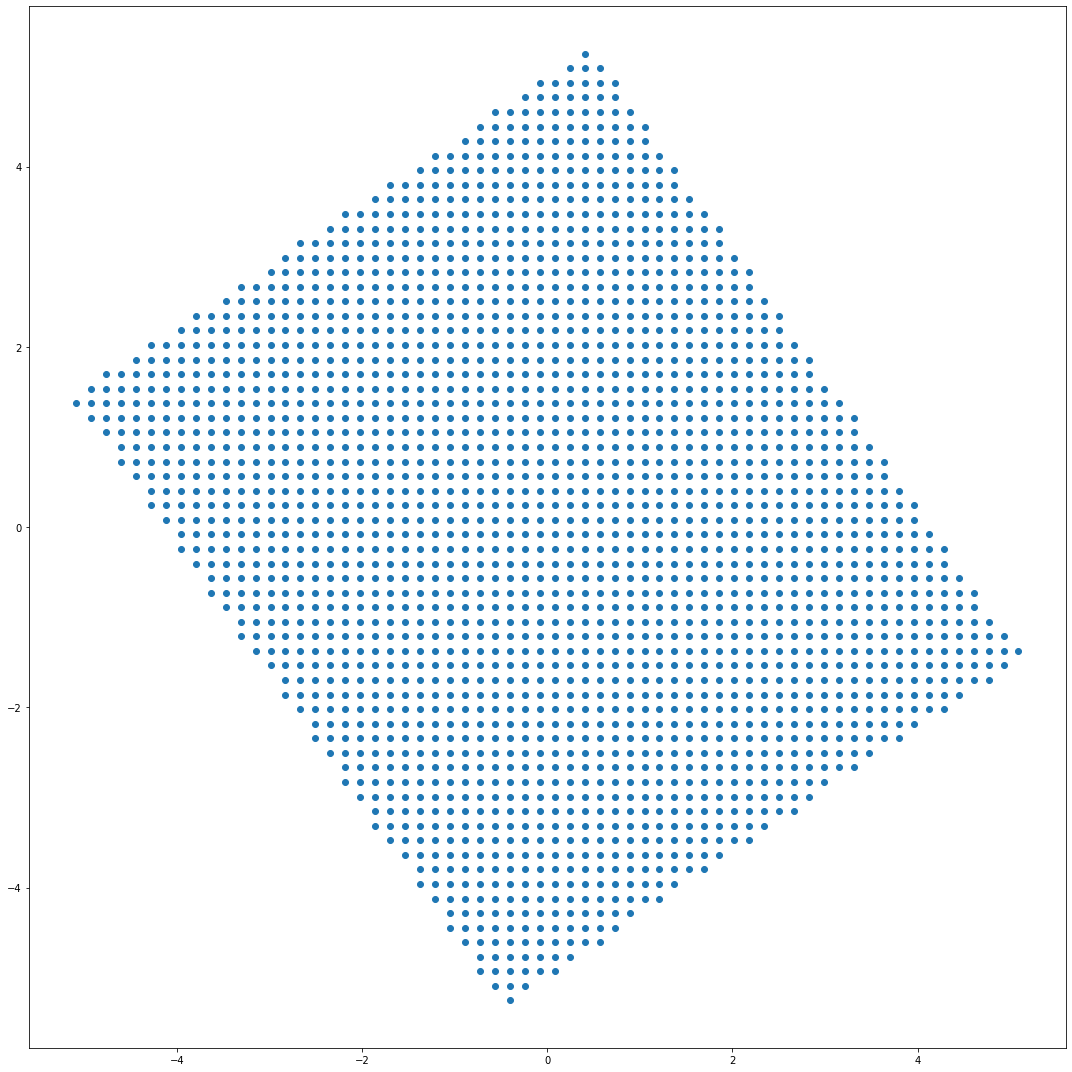

In [9]:
np_coord_rect = np.array(coord_rect)

fig = plt.figure()
# Set the figure size
plt.rcParams["figure.figsize"] = [15.0, 15.0]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension

# Scatter plot
plt.scatter(np_coord_rect[:, 0], np_coord_rect[:, 1])

# Display the plot
plt.show()


In [10]:
plt.close()
plt.cla()
plt.clf()

<Figure size 1080x1080 with 0 Axes>

In [11]:
ellipse_coord = []
for x,y in coord_rect:
    if(1.7363*x*x + 2*.3660*x*y + 1.4729*y*y < 15.8091):
        ellipse_coord.append([x,y])
print(len(ellipse_coord))

1222


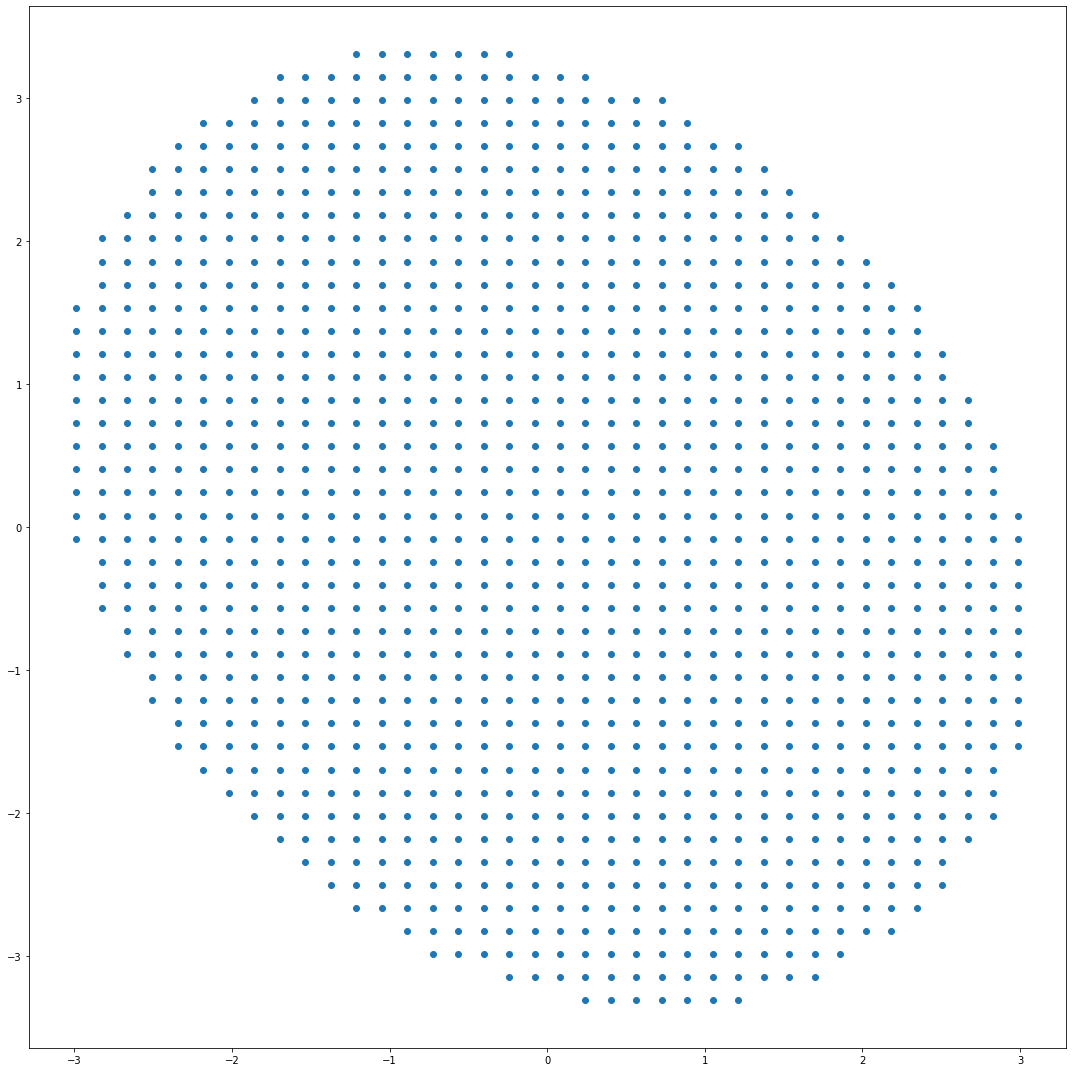

In [12]:
np_coord_ellipse = np.array(ellipse_coord)

fig = plt.figure()
# Set the figure size
plt.rcParams["figure.figsize"] = [15.0, 15.0]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension

# Scatter plot
plt.scatter(np_coord_ellipse[:, 0], np_coord_ellipse[:, 1])

# Display the plot
plt.show()

In [13]:
print(np_coord_ellipse.shape[0])
graph = np.concatenate((ellipse_coord,np.ones((np_coord_ellipse.shape[0], 1))), axis = 1)
print(graph)

1222
[[-2.98989899 -0.08080808  1.        ]
 [-2.98989899  0.08080808  1.        ]
 [-2.98989899  0.24242424  1.        ]
 ...
 [ 2.98989899 -0.24242424  1.        ]
 [ 2.98989899 -0.08080808  1.        ]
 [ 2.98989899  0.08080808  1.        ]]


In [14]:
actual_feedback = 1.464*np_coord_ellipse[:, 0] + 5.90*np_coord_ellipse[:, 1]
print(actual_feedback)

[-4.8539798  -3.90044444 -2.94690909 ...  2.94690909  3.90044444
  4.8539798 ]


In [15]:
quasi_feedback = np.array([quasi_interpolant(x,y,5, 0.1) for (x,y) in np_coord_ellipse])

In [16]:
quasi_interpolant(-1.83838384, 0.66666667, 5, 0.1)

1.2419394112400017

In [17]:
print(np.max(quasi_feedback - actual_feedback))
print(np.min(quasi_feedback - actual_feedback))

4.973799150320701e-14
-3.907985046680551e-14


In [18]:
error = np.abs(quasi_feedback - actual_feedback)
print(error)
error_plot = np.concatenate((np_coord_ellipse,error.reshape((np_coord_ellipse.shape[0], 1))), axis = 1)

[2.66453526e-15 2.22044605e-15 1.33226763e-15 ... 1.77635684e-15
 8.88178420e-16 8.88178420e-16]


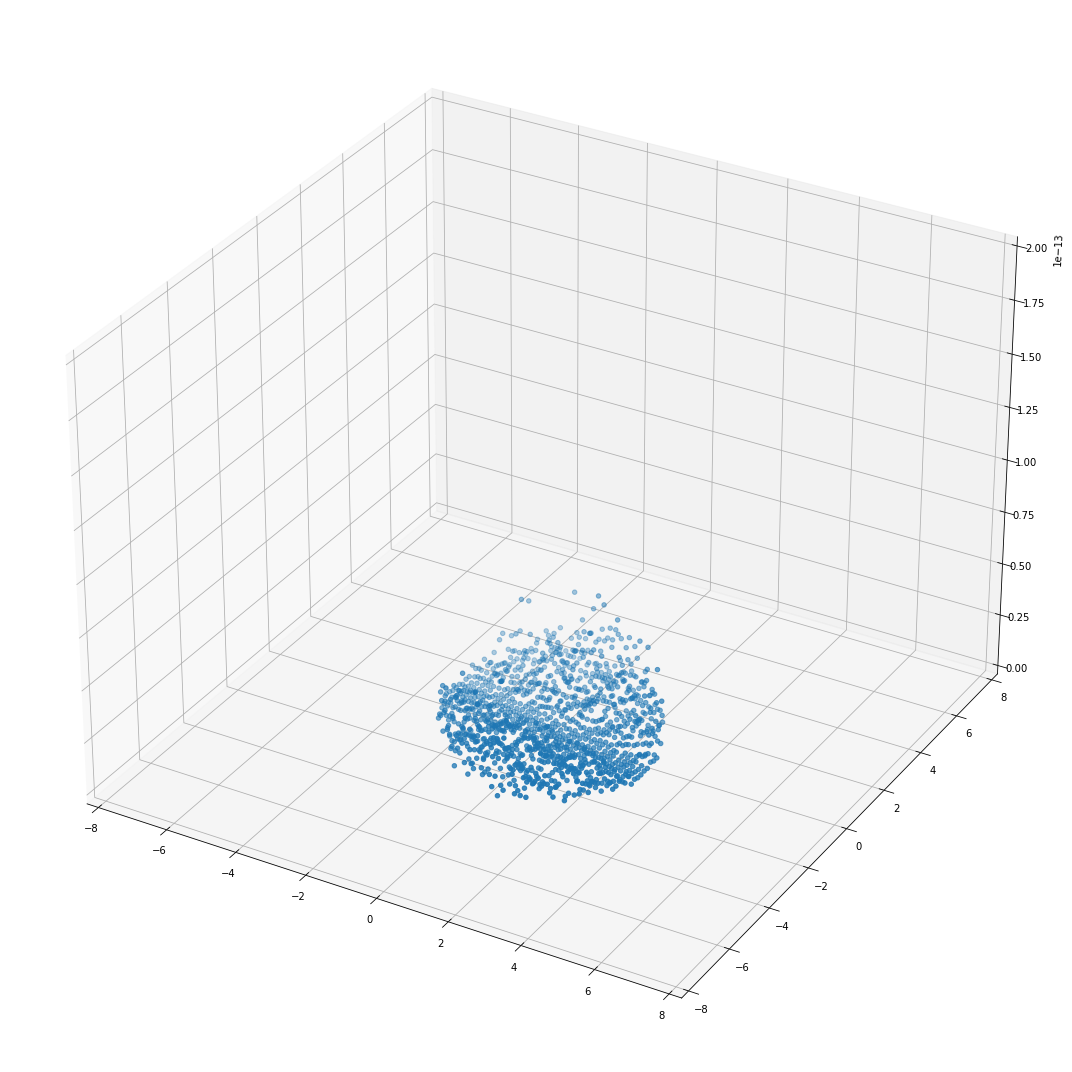

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points
ax.scatter3D(error_plot[:, 0],error_plot[:, 1], error_plot[:, 2], cmap='Greens');


ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [ ]:
interpolant = np.zeros((np_coord_ellipse.shape))
print(interpolant.shape)

In [ ]:
print(interpolant[1][1])

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(np_coord_ellipse[:, 0], Y, error, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 2e-13)

plt.show()